In [140]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# !pip install contextily

import pandas as pd
import geopandas as gpd
from sodapy import Socrata
import glob
import matplotlib.pyplot as plt
from matplotlib import colors
import contextily as ctx

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# # First 2000 results, returned as JSON from API / converted to Python list of
# # dictionaries by sodapy.
# results = client.get("bkfu-528j?event_name=pride", limit=2000)

# # Convert to pandas DataFrame
# results_df = pd.DataFrame.from_records(results)

In [150]:
df = pd.read_csv('/Users/user/Downloads/NYC_Permitted_Event_Information_-_Historical (2).csv')
df.head()

,Event ID,Event Name,Start Date/Time,End Date/Time,Event Agency,Event Type,Event Borough,Event Location,Event Street Side,Street Closure Type,Community Board,Police Precinct
0,368421.0,Big Apple Circus,11/18/2017 07:00:00 PM,11/18/2017 08:00:00 PM,Parks Department,Special Event,Manhattan,"Damrosch Park: Damrosch Park ,Damrosch Park: T...",NaN,NaN,"7,","20,"
1,330050.0,Mt. Eden Farmer's Market,11/16/2017 08:00:00 AM,11/16/2017 04:00:00 PM,Parks Department,Special Event,Bronx,Mount Eden Malls: Mount Eden Malls,NaN,NaN,"4,","44,"
2,314111.0,Columbia Greenmarket Thursday,11/21/2017 08:00:00 AM,11/21/2017 05:00:00 PM,Street Activity Permit Office,Farmers Market,Manhattan,BROADWAY between WEST 114 STREET and WEST 1...,East,Sidewalk and Curb Lane Closure,"9,","26,"
3,369850.0,Lawn Maintenance,11/23/2017 12:00:00 AM,11/23/2017 11:58:00 PM,Parks Department,Construction,Manhattan,Madison Square Park: Center Lawn,NaN,NaN,"5,","13,"
4,335783.0,"October, November December model aircraft flying",11/22/2017 09:00:00 AM,11/22/2017 08:00:00 PM,Parks Department,Special Event,Staten Island,LaTourette Park & Golf Course: Model Airplane ...,NaN,NaN,"2,","122,"


In [155]:
df = df.dropna()
selected_tuples = df[df['Event Borough'].str.contains ("Manhattan")]

selected_tuples

,Event ID,Event Name,Start Date/Time,End Date/Time,Event Agency,Event Type,Event Borough,Event Location,Event Street Side,Street Closure Type,Community Board,Police Precinct
2,314111.0,Columbia Greenmarket Thursday,11/21/2017 08:00:00 AM,11/21/2017 05:00:00 PM,Street Activity Permit Office,Farmers Market,Manhattan,BROADWAY between WEST 114 STREET and WEST 1...,East,Sidewalk and Curb Lane Closure,"9,","26,"
25,318106.0,Old Cathedral Outdoor Market,12/01/2017 10:00:00 AM,12/01/2017 07:00:00 PM,Street Activity Permit Office,Sidewalk Sale,Manhattan,PRINCE STREET between MOTT STREET and MULBERR...,North,Sidewalk and Street Closure,"2,","5,"
30,315096.0,East 67th Street Market,12/02/2017 06:00:00 AM,12/02/2017 05:00:00 PM,Street Activity Permit Office,Farmers Market,Manhattan,408 EAST 67 STREET between YORK AVENUE and F...,South,Partial Sidewalk Closure,"8,","19,"
38,314120.0,Inwood Greenmarket Saturday,11/18/2017 08:00:00 AM,11/18/2017 03:00:00 PM,Street Activity Permit Office,Farmers Market,Manhattan,ISHAM STREET between COOPER STREET and SEAMAN...,Both,Sidewalk and Curb Lane Closure,"12,","34,"
43,340926.0,Hamilton Heights One-Day Plaza,11/22/2017 10:00:00 AM,11/22/2017 06:00:00 PM,Street Activity Permit Office,Plaza Event,Manhattan,HAMILTON PLACE between WEST 143 STREET and W...,Full,Full Street Closure,"9,","30,"
...,...,...,...,...,...,...,...,...,...,...,...,...
16935231,686586.0,Murray Hill Farmers Market,05/07/2023 05:00:00 AM,05/07/2023 08:00:00 PM,Street Activity Permit Office,Farmers Market,Manhattan,2 AVENUE between EAST 32 STREET and EAST 3...,East,Sidewalk and Curb Lane Closure,"6,","17,"
16935492,687665.0,Old Cathedral Outdoor Market,05/20/2023 09:00:00 AM,05/20/2023 08:00:00 PM,Street Activity Permit Office,Sidewalk Sale,Manhattan,PRINCE STREET between MOTT STREET and MULBERRY...,North,Partial Sidewalk Closure,"2,","5,"
16935729,683661.0,82 street Greenmarket Saturday,05/13/2023 08:00:00 AM,05/13/2023 05:00:00 PM,Street Activity Permit Office,Farmers Market,Manhattan,EAST 82 STREET between 1 AVENUE and YORK AVENUE,South,Sidewalk and Curb Lane Closure,"8,","19,"
16936070,688026.0,Stone Street Pedestrian Mall,05/05/2023 11:00:00 AM,05/05/2023 10:00:00 PM,Street Activity Permit Office,Street Event,Manhattan,MILL LANE between SOUTH WILLIAM STREET and STO...,Full,Full Street Closure,"1,","1,"


In [143]:
!pip install requests
import requests
url = "https://data.cityofnewyork.us/resource/bkfu-528j.json?event_borough=Manhattan"
response = requests.get(url)
if response.status_code == 200:
    data = response.json()  # Parse the response as JSON
    # Process and use the data as needed
else:
    print("Request failed with status code:", response.status_code)

data

[{'event_id': '368421',
  'event_name': 'Big Apple Circus',
  'start_date_time': '2017-11-18T19:00:00.000',
  'end_date_time': '2017-11-18T20:00:00.000',
  'event_agency': 'Parks Department',
  'event_type': 'Special Event',
  'event_borough': 'Manhattan',
  'event_location': 'Damrosch Park: Damrosch Park ,Damrosch Park: Tent Area ,Damrosch Park: Tent Area ,Damrosch Park: Bandshell ',
  'street_closure_type': 'N/A',
  'community_board': '7, ',
  'police_precinct': '20, '},
 {'event_id': '314111',
  'event_name': 'Columbia  Greenmarket Thursday',
  'start_date_time': '2017-11-21T08:00:00.000',
  'end_date_time': '2017-11-21T17:00:00.000',
  'event_agency': 'Street Activity Permit Office',
  'event_type': 'Farmers Market',
  'event_borough': 'Manhattan',
  'event_location': ' BROADWAY between WEST  114 STREET and WEST  116 STREET',
  'event_street_side': 'East',
  'street_closure_type': 'Sidewalk and Curb Lane Closure ',
  'community_board': '9, ',
  'police_precinct': '26, '},
 {'event_

In [144]:
results_df = pd.DataFrame.from_records(data)
results_df

,event_id,event_name,start_date_time,end_date_time,event_agency,event_type,event_borough,event_location,street_closure_type,community_board,police_precinct,event_street_side
0,368421,Big Apple Circus,2017-11-18T19:00:00.000,2017-11-18T20:00:00.000,Parks Department,Special Event,Manhattan,"Damrosch Park: Damrosch Park ,Damrosch Park: T...",N/A,"7,","20,",NaN
1,314111,Columbia Greenmarket Thursday,2017-11-21T08:00:00.000,2017-11-21T17:00:00.000,Street Activity Permit Office,Farmers Market,Manhattan,BROADWAY between WEST 114 STREET and WEST 1...,Sidewalk and Curb Lane Closure,"9,","26,",East
2,369850,Lawn Maintenance,2017-11-23T00:00:00.000,2017-11-23T23:58:00.000,Parks Department,Construction,Manhattan,Madison Square Park: Center Lawn,N/A,"5,","13,",NaN
3,369858,Lawn Maintenance,2017-12-06T00:00:00.000,2017-12-06T23:58:00.000,Parks Department,Construction,Manhattan,Madison Square Park: Dogwood / 25th St Lawn No...,N/A,"5,","13,",NaN
4,363387,Crab Apple Grove LAWN CLOSURE,2017-11-18T00:00:00.000,2017-11-18T23:59:00.000,Parks Department,Construction,Manhattan,Riverside Park: Crab Apple Grove-RSP,N/A,"7,","24,",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,368421,Big Apple Circus,2017-11-08T19:00:00.000,2017-11-08T20:00:00.000,Parks Department,Special Event,Manhattan,"Damrosch Park: Damrosch Park ,Damrosch Park: T...",N/A,"7,","20,",NaN
996,316786,2017 NO AMPLIFIED SOUND,2017-12-03T07:00:00.000,2017-12-03T21:00:00.000,Parks Department,Special Event,Manhattan,East River Park: Amphitheater,N/A,"3,","7,",NaN
997,376356,Billy Johnson Playground Lawn reconstruction,2017-11-23T00:00:00.000,2017-11-23T23:00:00.000,Parks Department,Construction,Manhattan,Central Park: Johnson Playground Lawns,N/A,"64,","22,",NaN
998,316793,2017 NO AMPLIFED SOUND,2017-11-25T07:00:00.000,2017-11-25T21:00:00.000,Parks Department,Special Event,Manhattan,Jackie Robinson Park: Bandshell,N/A,"10,","30,",NaN


In [29]:
results = client.get("bkfu-528j?event", limit=200000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

,event_id,event_name,start_date_time,end_date_time,event_agency,event_type,event_borough,event_location,street_closure_type,community_board,police_precinct,event_street_side
0,368421,Big Apple Circus,2017-11-18T19:00:00.000,2017-11-18T20:00:00.000,Parks Department,Special Event,Manhattan,"Damrosch Park: Damrosch Park ,Damrosch Park: T...",N/A,"7,","20,",NaN
1,330050,Mt. Eden Farmer's Market,2017-11-16T08:00:00.000,2017-11-16T16:00:00.000,Parks Department,Special Event,Bronx,Mount Eden Malls: Mount Eden Malls,N/A,"4,","44,",NaN
2,314111,Columbia Greenmarket Thursday,2017-11-21T08:00:00.000,2017-11-21T17:00:00.000,Street Activity Permit Office,Farmers Market,Manhattan,BROADWAY between WEST 114 STREET and WEST 1...,Sidewalk and Curb Lane Closure,"9,","26,",East
3,369850,Lawn Maintenance,2017-11-23T00:00:00.000,2017-11-23T23:58:00.000,Parks Department,Construction,Manhattan,Madison Square Park: Center Lawn,N/A,"5,","13,",NaN
4,335783,"October, November December model aircraft flying",2017-11-22T09:00:00.000,2017-11-22T20:00:00.000,Parks Department,Special Event,Staten Island,LaTourette Park & Golf Course: Model Airplane ...,N/A,"2,","122,",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,388888,Easter Sidewalk Sale 3/29- 4/1/2018,2018-03-29T09:00:00.000,2018-04-01T19:00:00.000,Street Activity Permit Office,Sidewalk Sale,Queens,MYRTLE AVENUE between WYCKOFF AVENUE and FRES...,Partial Sidewalk Closure,"5,","104,",Both
199996,390723,2018 Spring/Summer RIPA Signature Events,2018-04-09T08:00:00.000,2018-04-09T18:00:00.000,Parks Department,Special Event,Manhattan,Randall's Island Park: East River Waterfront P...,N/A,"11,","25,",NaN
199997,398971,Youth Sports,2018-04-13T15:00:00.000,2018-04-13T17:00:00.000,Parks Department,Special Event,Manhattan,Central Park: East Meadow North Lawn,N/A,"64,","22,",NaN
199998,381180,"Cedar Hill Winter Closure until April 7, 2018",2018-03-28T00:00:00.000,2018-03-28T01:00:00.000,Parks Department,Construction,Manhattan,Central Park: Cedar Hill,N/A,"64,","22,",NaN


In [133]:
# selected_tuples = selected_tuples.dropna()
selected_tuples = results_df[results_df['event_name'].str.contains ("Tribeca") & results_df['event_borough'].str.contains ("Manhattan")]

selected_tuples

,event_id,event_name,start_date_time,end_date_time,event_agency,event_type,event_borough,event_location,street_closure_type,community_board,police_precinct,event_street_side
132587,406915,Tribeca Film Festival,2018-04-16T00:00:00.000,2018-05-01T23:59:00.000,Street Activity Permit Office,Production Event,Manhattan,VARICK STREET between LAIGHT STREET and BEACH...,Sidewalk and Curb Lane Closure,"1,","1,",East
135530,407821,Tribeca Film Festival,2018-04-19T00:00:00.000,2018-04-22T23:59:00.000,Street Activity Permit Office,Street Event,Manhattan,VARICK STREET between LAIGHT STREET and BEACH...,Curb Lane Only,"1,","1,",West
165062,407833,Tribeca Film Festival,2018-04-19T17:00:00.000,2018-04-19T22:00:00.000,Street Activity Permit Office,Street Event,Manhattan,BROADWAY between WEST 74 STREET and WEST ...,Curb Lane Only,"7,","20,",East
166763,406916,Tribeca Film Festival,2018-05-02T00:00:00.000,2018-05-02T23:59:00.000,Street Activity Permit Office,Production Event,Manhattan,VARICK STREET between LAIGHT STREET and BEACH...,Sidewalk and Curb Lane Closure,"1, 2,","1, 6,",West


In [49]:
data_files = glob.glob('yellow_tripdata_2018-04.parquet') 

In [99]:
# List to store each month in a dataframe
dataframes = []
df = pd.read_parquet(data_files)
dataframes.append(df)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2018-04-01 00:22:20,2018-04-01 00:22:26,1,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,None,None
1,1,2018-04-01 00:47:37,2018-04-01 01:08:42,1,6.70,1,N,152,90,2,22.5,0.5,0.5,0.00,0.0,0.3,23.80,None,None
2,1,2018-04-01 00:02:13,2018-04-01 00:17:52,2,4.10,1,N,239,158,1,15.5,0.5,0.5,3.35,0.0,0.3,20.15,None,None
3,1,2018-04-01 00:46:49,2018-04-01 00:52:05,1,0.70,1,N,90,249,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,None,None
4,1,2018-04-01 00:19:04,2018-04-01 00:19:09,1,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9306211,1,2018-04-30 23:15:20,2018-04-30 23:32:58,1,3.60,1,N,148,112,1,14.5,0.5,0.5,3.15,0.0,0.3,18.95,None,None
9306212,2,2018-04-30 23:02:02,2018-04-30 23:03:37,5,0.01,1,N,151,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,None,None
9306213,2,2018-04-30 23:38:18,2018-04-30 23:44:57,1,1.62,1,N,186,125,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,None,None
9306214,2,2018-04-30 23:07:08,2018-04-30 23:23:04,1,6.36,1,N,261,162,2,20.0,0.5,0.5,0.00,0.0,0.3,21.30,None,None


In [100]:
start_date = pd.to_datetime('2018-04-08 13:00:00')
end_date = pd.to_datetime('2018-04-08 17:00:00')
df = df[(df['tpep_pickup_datetime'] >= start_date) & (df['tpep_pickup_datetime'] <= end_date)]

df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2211457,2,2018-04-08 13:00:30,2018-04-08 13:15:31,1,1.88,1,N,79,234,1,11.0,0.0,0.5,2.36,0.0,0.3,14.16,None,None
2211545,2,2018-04-08 13:06:04,2018-04-08 13:15:58,1,1.11,1,N,249,234,1,8.0,0.0,0.5,1.76,0.0,0.3,10.56,None,None
2211739,2,2018-04-08 13:02:37,2018-04-08 13:12:38,1,1.39,1,N,224,79,1,8.5,0.0,0.5,2.32,0.0,0.3,11.62,None,None
2211820,2,2018-04-08 13:00:31,2018-04-08 13:07:16,1,0.82,1,N,230,161,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,None,None
2212088,2,2018-04-08 13:00:28,2018-04-08 13:23:24,1,2.18,1,N,107,246,2,15.0,0.0,0.5,0.00,0.0,0.3,15.80,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369318,2,2018-04-08 16:54:14,2018-04-09 16:10:12,2,3.87,1,N,246,237,1,14.5,0.5,0.5,3.16,0.0,0.3,18.96,None,None
2377396,2,2018-04-08 16:27:31,2018-04-08 16:41:33,1,4.56,1,N,68,25,1,15.5,0.5,0.5,3.36,0.0,0.3,20.16,None,None
2382646,2,2018-04-08 16:32:45,2018-04-08 16:36:10,2,1.01,1,N,246,246,1,5.0,0.5,0.5,1.26,0.0,0.3,7.56,None,None
2382647,2,2018-04-08 16:37:21,2018-04-08 17:03:42,2,10.42,1,N,68,129,2,32.0,0.5,0.5,0.00,0.0,0.3,33.30,None,None


In [52]:
taxi_zones = pd.read_csv("taxi_zones.csv")
taxi_zones

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...,...
258,256,0.067915,MULTIPOLYGON (((-73.95834207500002 40.71330630...,0.000169,Williamsburg (South Side),256,Brooklyn
259,259,0.126750,MULTIPOLYGON (((-73.85107116191898 40.91037152...,0.000395,Woodlawn/Wakefield,259,Bronx
260,260,0.133514,MULTIPOLYGON (((-73.90175373399988 40.76077547...,0.000422,Woodside,260,Queens
261,261,0.027120,MULTIPOLYGON (((-74.01332610899988 40.70503078...,0.000034,World Trade Center,261,Manhattan


In [53]:
manhattan_zones = taxi_zones[taxi_zones['borough'] == 'Manhattan']
manhattan_zones

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
9,24,0.047000,MULTIPOLYGON (((-73.95953658899997 40.79871852...,0.000061,Bloomingdale,24,Manhattan
12,12,0.036661,MULTIPOLYGON (((-74.01565756599994 40.70483308...,0.000042,Battery Park,12,Manhattan
13,13,0.050281,MULTIPOLYGON (((-74.01244109299991 40.71905767...,0.000149,Battery Park City,13,Manhattan
40,41,0.052793,MULTIPOLYGON (((-73.94773985499985 40.80959972...,0.000143,Central Harlem,41,Manhattan
...,...,...,...,...,...,...,...
246,244,0.080569,MULTIPOLYGON (((-73.94068822000003 40.85131543...,0.000360,Washington Heights South,244,Manhattan
248,246,0.069467,MULTIPOLYGON (((-74.00439976203513 40.76267135...,0.000281,West Chelsea/Hudson Yards,246,Manhattan
251,249,0.036384,MULTIPOLYGON (((-74.00250642399995 40.72901638...,0.000072,West Village,249,Manhattan
261,261,0.027120,MULTIPOLYGON (((-74.01332610899988 40.70503078...,0.000034,World Trade Center,261,Manhattan


In [114]:
manhattan_zones.head(50)

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
9,24,0.047000,MULTIPOLYGON (((-73.95953658899997 40.79871852...,0.000061,Bloomingdale,24,Manhattan
12,12,0.036661,MULTIPOLYGON (((-74.01565756599994 40.70483308...,0.000042,Battery Park,12,Manhattan
13,13,0.050281,MULTIPOLYGON (((-74.01244109299991 40.71905767...,0.000149,Battery Park City,13,Manhattan
40,41,0.052793,MULTIPOLYGON (((-73.94773985499985 40.80959972...,0.000143,Central Harlem,41,Manhattan
41,45,0.045907,MULTIPOLYGON (((-73.99750445299988 40.71406913...,0.000091,Chinatown,45,Manhattan
43,42,0.092709,MULTIPOLYGON (((-73.93436121591056 40.83620061...,0.000264,Central Harlem North,42,Manhattan
44,43,0.099739,MULTIPOLYGON (((-73.97255352299985 40.76489773...,0.000380,Central Park,43,Manhattan
47,48,0.043747,MULTIPOLYGON (((-73.99117738199989 40.75532984...,0.000094,Clinton East,48,Manhattan
49,50,0.055748,MULTIPOLYGON (((-73.99667705784736 40.77351005...,0.000173,Clinton West,50,Manhattan


In [109]:
selected_rows = manhattan_zones[manhattan_zones['zone'] == 'Union Square Park: North Plaza']
selected_rows

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough


In [101]:
# Removing all rows where Pickup or dropoff is outside of Manhattan
df = df[df['PULocationID'].isin(manhattan_zones['LocationID'])]
df = df[df['DOLocationID'].isin(manhattan_zones['LocationID'])]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2211457,2,2018-04-08 13:00:30,2018-04-08 13:15:31,1,1.88,1,N,79,234,1,11.0,0.0,0.5,2.36,0.0,0.3,14.16,None,None
2211545,2,2018-04-08 13:06:04,2018-04-08 13:15:58,1,1.11,1,N,249,234,1,8.0,0.0,0.5,1.76,0.0,0.3,10.56,None,None
2211739,2,2018-04-08 13:02:37,2018-04-08 13:12:38,1,1.39,1,N,224,79,1,8.5,0.0,0.5,2.32,0.0,0.3,11.62,None,None
2211820,2,2018-04-08 13:00:31,2018-04-08 13:07:16,1,0.82,1,N,230,161,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,None,None
2212088,2,2018-04-08 13:00:28,2018-04-08 13:23:24,1,2.18,1,N,107,246,2,15.0,0.0,0.5,0.00,0.0,0.3,15.80,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367467,2,2018-04-08 15:20:06,2018-04-08 15:35:51,5,3.46,1,N,79,246,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36,None,None
2367468,2,2018-04-08 15:45:02,2018-04-08 15:47:29,5,0.03,1,N,186,186,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,None,None
2369318,2,2018-04-08 16:54:14,2018-04-09 16:10:12,2,3.87,1,N,246,237,1,14.5,0.5,0.5,3.16,0.0,0.3,18.96,None,None
2382646,2,2018-04-08 16:32:45,2018-04-08 16:36:10,2,1.01,1,N,246,246,1,5.0,0.5,0.5,1.26,0.0,0.3,7.56,None,None


In [74]:
# Read in the taxi zone shapefile
sf = gpd.read_file('taxi/taxi_zones.shp')
zone = pd.read_csv("taxi_zones.csv")

# Set CRS for the GeoDataFrame
sf = sf.set_crs('epsg:2263')

# Convert the geometry to the desired CRS
sf['geometry'] = sf['geometry'].to_crs('epsg:4326')
sf

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


In [75]:
zone

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...,...
258,256,0.067915,MULTIPOLYGON (((-73.95834207500002 40.71330630...,0.000169,Williamsburg (South Side),256,Brooklyn
259,259,0.126750,MULTIPOLYGON (((-73.85107116191898 40.91037152...,0.000395,Woodlawn/Wakefield,259,Bronx
260,260,0.133514,MULTIPOLYGON (((-73.90175373399988 40.76077547...,0.000422,Woodside,260,Queens
261,261,0.027120,MULTIPOLYGON (((-74.01332610899988 40.70503078...,0.000034,World Trade Center,261,Manhattan


In [102]:
# Compute pickup and dropoff amount of each zone
pu_zone = df.groupby(['PULocationID'], as_index=False).size()
do_zone = df.groupby(['DOLocationID'], as_index=False).size()
pu_zone = gpd.GeoDataFrame(pd.merge(pu_zone, sf, left_on='PULocationID', right_on='LocationID')).drop('LocationID', axis=1)
do_zone = gpd.GeoDataFrame(pd.merge(do_zone, sf, left_on='DOLocationID', right_on='LocationID')).drop('LocationID', axis=1)
pu_zone = pu_zone.to_crs(epsg=3857)
do_zone = do_zone.to_crs(epsg=3857)

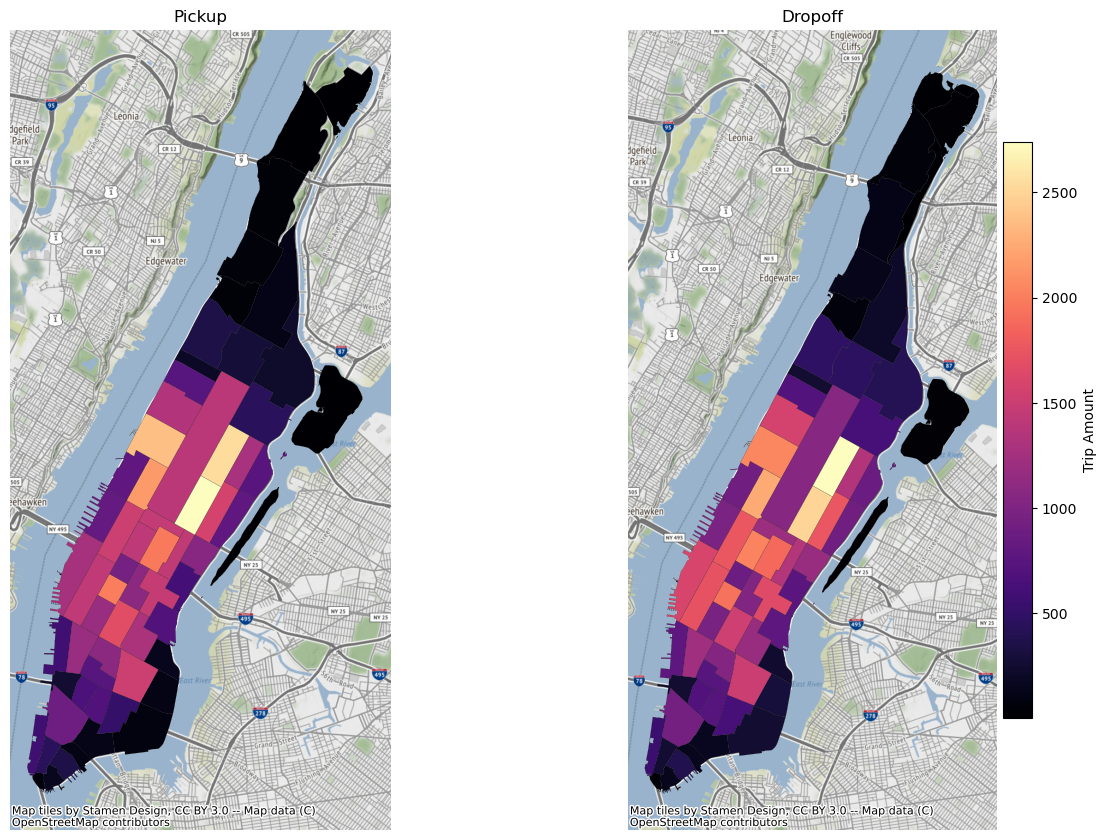

In [103]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.09, right=0.8, wspace=0.02, hspace=0.02)

# Shared plot parameters
plot_params = {
    'linewidth': 0.1,
    'edgecolor': 'k',
    'cmap': 'magma',
    'legend': False,
}

# Data, titles, and axes for the plots
data = [(pu_zone, axs[0], 'Pickup'), (do_zone, axs[1], 'Dropoff')]

for zone_data, ax, title in data:
    vmin, vmax = zone_data['size'].min(), zone_data['size'].max()
    ax = zone_data.plot(column='size', norm=colors.Normalize(vmin=vmin, vmax=vmax), ax=ax, **plot_params)
    ctx.add_basemap(ax)
    ax.set_title(title)
    ax.set_axis_off()

# draw the color bar
patch_col = axs[0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.72, orientation="vertical", pad=0.005)
cb.ax.set_ylabel('Trip Amount')
plt.show()